In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-25  104.910004  105.449997  102.449997  102.570000  102.570000   
2023-04-26  105.040001  106.620003  104.099998  104.980003  104.980003   
2023-04-27  108.160004  110.860001  106.800003  109.820000  109.820000   
2023-04-28  107.730003  109.480003  104.330002  105.449997  105.449997   
2023-05-01  104.949997  105.230003  101.820000  102.050003  102.050003   
2023-05-02  101.470001  103.900002  101.150002  103.629997  103.629997   
2023-05-03  103.739998  105.959999  103.279999  103.650002  103.650002   
2023-05-04  104.040001  105.389999  103.309998  104.000000  104.000000   
2023-05-05  104.269997  105.760002  103.550003  105.660004  105.660004   
2023-05-08  105.040001  106.095001  104.709801  105.830002  105.830002   

               Volume company_name  
Date                                
2023-04-25   65026800       AMAZON  
2023-04-26   73803800       AMAZON  
2023-04-27  149961200       AMAZON  
2023-04-28  130565000       AMAZON  
2023-05-01   74728100       AMAZON  
2023-05-02   73469400       AMAZON  
2023-05-03   65051900       AMAZON  
2023-05-04   45345500       AMAZON  
2023-05-05   56912900       AMAZON  
2023-05-08   46863632       AMAZON

In [2]:
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   149.580359  151.576135  147.848566  149.824741  149.481433   
std     11.075802   10.896641   11.328421   11.173551   11.210275   
min    126.010002  127.769997  124.169998  125.019997  124.829399   
25%    142.110001  143.854996  139.949997  142.464996  141.973434   
50%    148.869995  150.919998  147.240005  149.350006  148.910004   
75%    156.809998  158.250000  154.345001  157.059998  156.516861   
max    173.750000  176.149994  173.119995  174.550003  173.995270   

             Volume  
count  2.510000e+02  
mean   7.789400e+07  
std    2.438126e+07  
min    3.519590e+07  
25%    6.224455e+07  
50%    7.340920e+07  
75%    8.765635e+07  
max    1.826020e+08

In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-05-09 to 2023-05-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


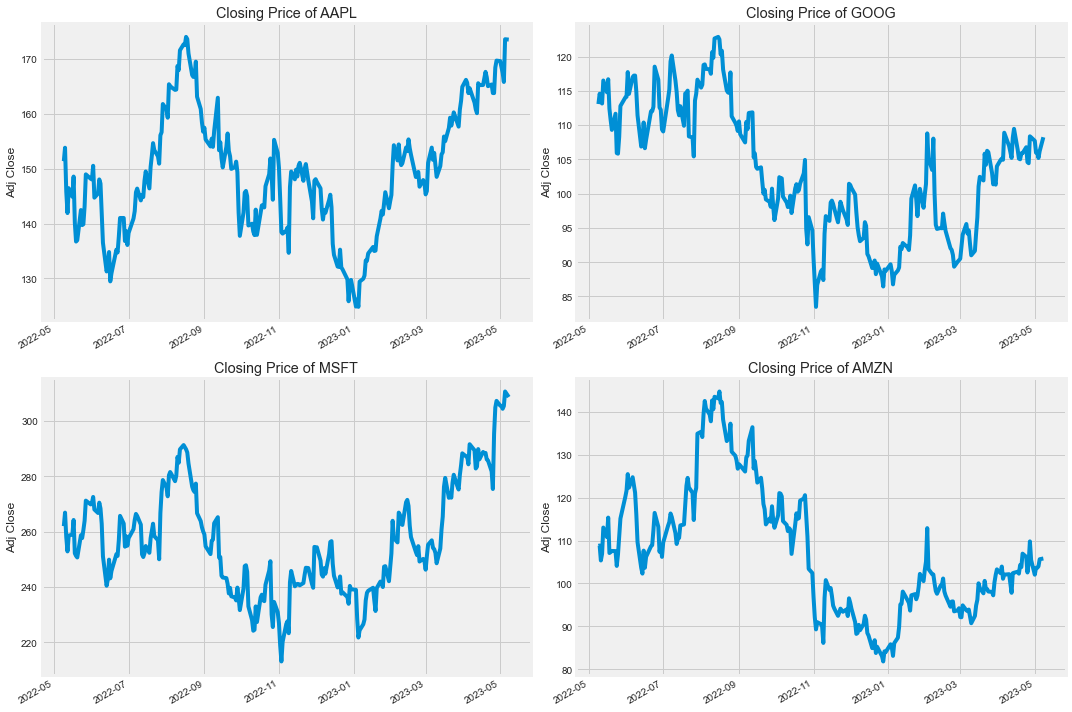

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

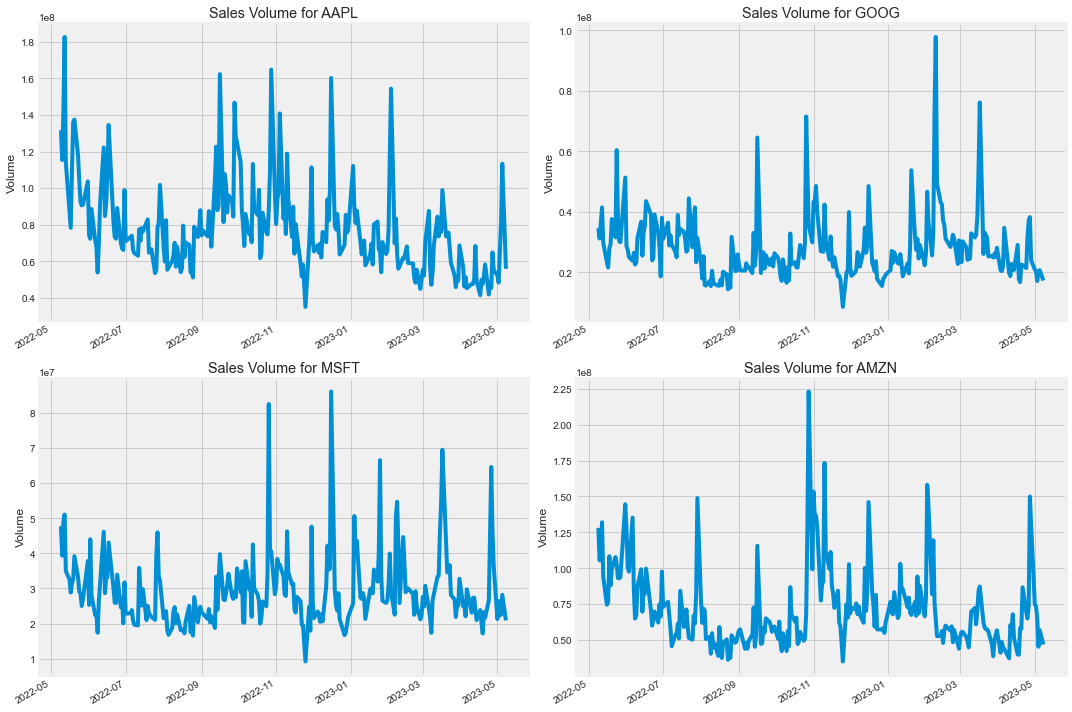

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [6]:
import plotly.graph_objs as go
import plotly.subplots as sp

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig = sp.make_subplots(rows=2, cols=2, 
                       subplot_titles=("AAPL", "GOOG", "MSFT", "AMZN"))

fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Adj Close'], name='Adj Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 10 days'], name='MA for 10 days'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 20 days'], name='MA for 20 days'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 50 days'], name='MA for 50 days'), row=1, col=1)

fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Adj Close'], name='Adj Close'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 10 days'], name='MA for 10 days'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 20 days'], name='MA for 20 days'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 50 days'], name='MA for 50 days'), row=1, col=2)

fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Adj Close'], name='Adj Close'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 10 days'], name='MA for 10 days'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 20 days'], name='MA for 20 days'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 50 days'], name='MA for 50 days'), row=2, col=1)

fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Adj Close'], name='Adj Close'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 10 days'], name='MA for 10 days'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 20 days'], name='MA for 20 days'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 50 days'], name='MA for 50 days'), row=2, col=2)

fig.update_layout(height=600, width=800, title="Moving Averages")
fig.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


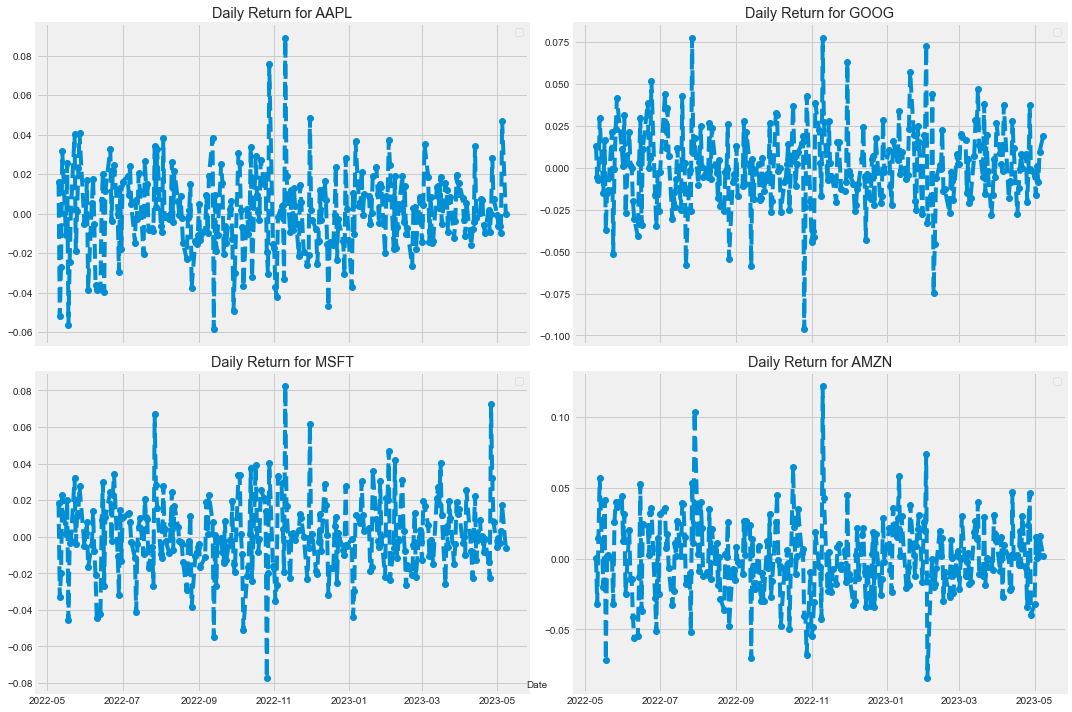

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axs = axs.flatten()

for ax, company, name in zip(axs, company_list, tech_list):
    company['Daily Return'] = company['Adj Close'].pct_change()
    ax.plot(company['Daily Return'], linestyle='--', marker='o')
    ax.set_title(f"Daily Return for {name}")
    ax.set_xlabel(None)
    ax.legend()
    
fig.text(0.5, 0.04, 'Date', ha='center')
fig.tight_layout()


In [9]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


AAPL      AMZN      GOOG      MSFT
Date                                              
2022-05-09       NaN       NaN       NaN       NaN
2022-05-10  0.016112  0.000643  0.013269  0.018595
2022-05-11 -0.051841 -0.032032 -0.005441 -0.033210
2022-05-12 -0.026894  0.014790 -0.007020 -0.019958
2022-05-13  0.031916  0.057276  0.029644  0.022596

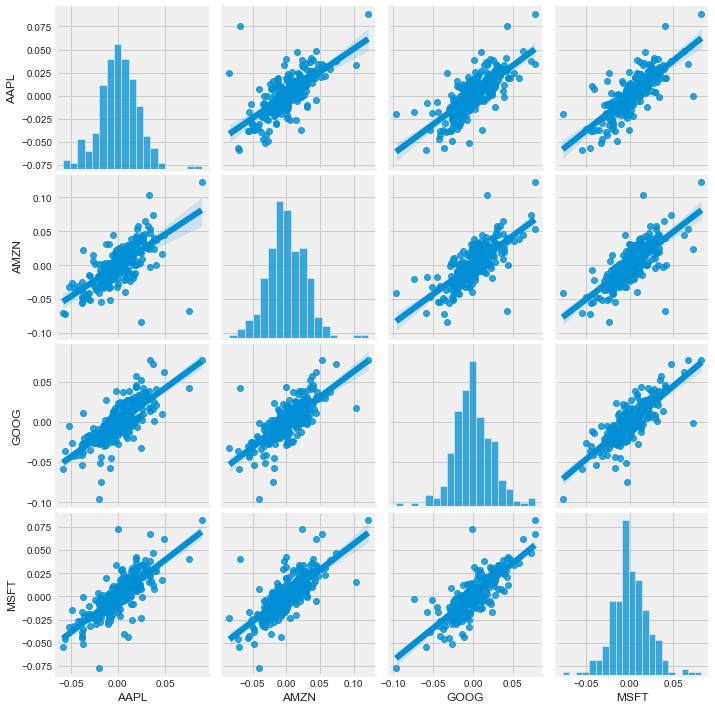

In [10]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

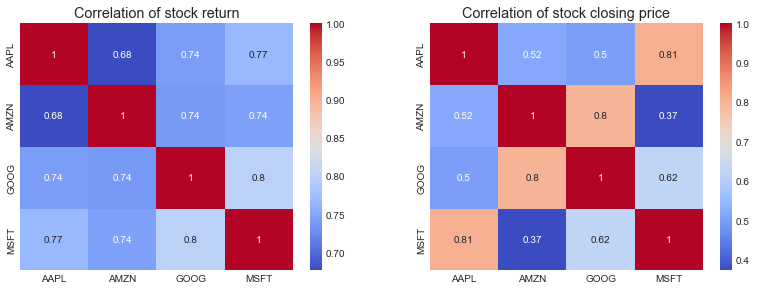

In [11]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of stock closing price')


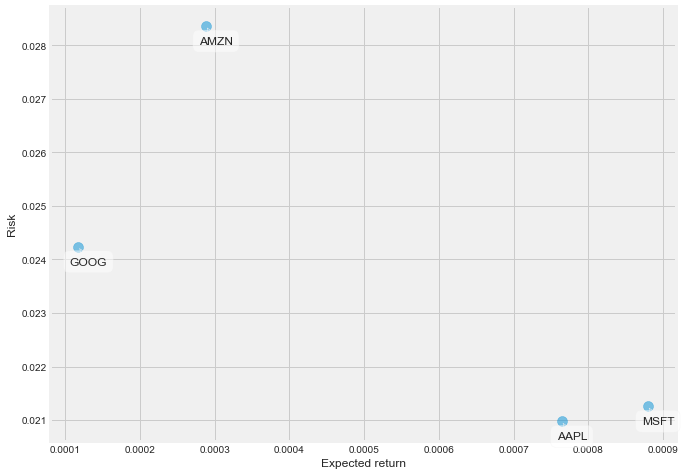

In [12]:
rets = tech_rets.dropna()

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(rets.mean(), rets.std(), s=100, alpha=0.5)
ax.set_xlabel('Expected return')
ax.set_ylabel('Risk')

for i, stock in enumerate(rets.columns):
    ax.annotate(stock, (rets.mean()[i], rets.std()[i]), xytext=(10, -10), 
                textcoords='offset points', fontsize=12, ha='center', va='top', 
                bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()


In [13]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.500193   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.567370   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.706893   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.839727   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.819364   
...                ...         ...         ...         ...         ...   
2023-05-02  170.089996  170.350006  167.539993  168.539993  168.539993   
2023-05-03  169.500000  170.919998  167.160004  167.449997  167.449997   
2023-05-04  164.889999  167.039993  164.309998  165.789993  165.789993   
2023-05-05  170.979996  174.300003  170.759995  173.570007  173.570007   
2023-05-08  172.479996  173.850006  172.110001  173.500000  173.500000   

               Volume  
Date                   
2012-01-03  302220800  
2012-01-04  260022000  
2012-01-05  271269600  
2012-01-06  318292800  
2012-01-09  394024400  
...               ...  
2023-05-02   48425700  
2023-05-03   65136000  
2023-05-04   81235400  
2023-05-05  113316400  
2023-05-08   55962793  

[2855 rows x 6 columns]

/Users/koushal/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:83: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




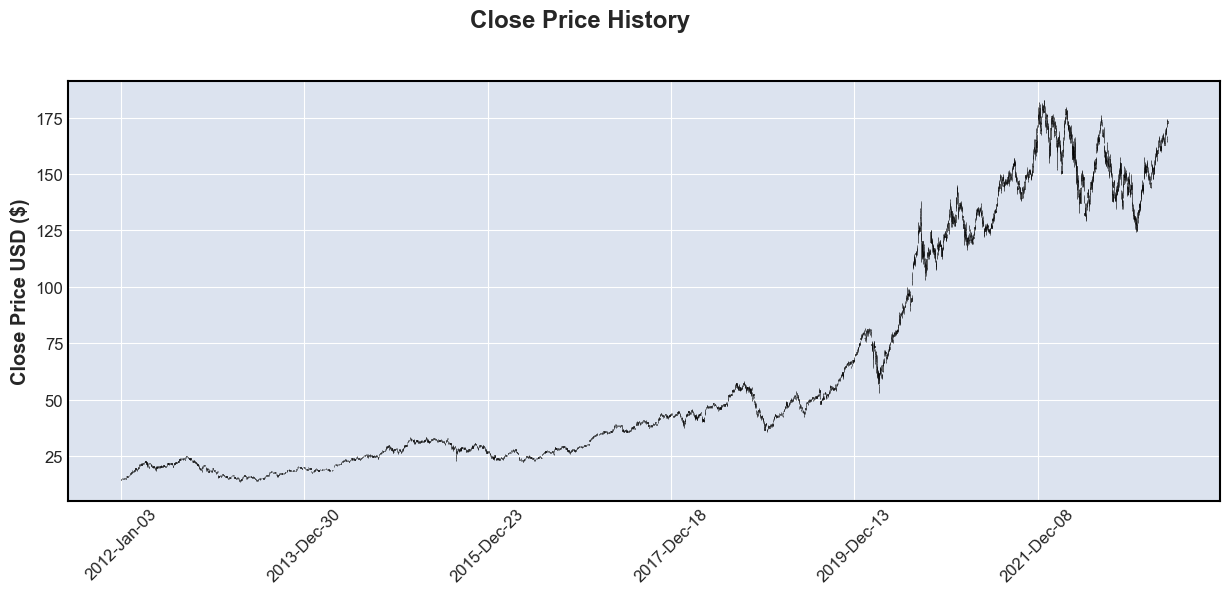

In [16]:
import mplfinance as mpf

mpf.plot(df, type='candle', figsize=(16,6), title='Close Price History', ylabel='Close Price USD ($)')


In [17]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


2713

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.90348828],
       [0.94978066],
       [0.94936411]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = [train_data[i-60:i, 0] for i in range(60, len(train_data))]
y_train = [train_data[i, 0] for i in range(60, len(train_data))]
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-05-08 20:31:39.282130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 20:31:44.792114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-08 20:31:44.795121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split

2653/2653 [==============================] - 59s 21ms/step - loss: 0.0015


In [21]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = np.array([test_data[i-60:i, 0] for i in range(60, len(test_data))])
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = dataset[training_data_len:, :]

# Get the models predicted price values 
predictions = scaler.inverse_transform(model.predict(x_test))

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


2023-05-08 20:33:23.306279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-08 20:33:23.308767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-08 20:33:23.310555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 1s 21ms/step


6.169589188626046

In [22]:
import plotly.graph_objs as go

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions'))
fig.update_layout(title='Model', xaxis_title='Date', yaxis_title='Close Price USD ($)', legend=dict(x=0, y=1, traceorder='normal'))
fig.show()


/var/folders/_f/_g7s1mjs4hb2bh8q33tftrdw0000gn/T/ipykernel_76201/3303336320.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
valid

Close  Predictions
Date                               
2022-10-13  142.990005   147.478699
2022-10-14  138.380005   147.207199
2022-10-17  142.410004   146.703247
2022-10-18  143.750000   146.700012
2022-10-19  143.860001   147.089630
...                ...          ...
2023-05-02  168.539993   170.960602
2023-05-03  167.449997   171.526566
2023-05-04  165.789993   171.787872
2023-05-05  173.570007   171.647903
2023-05-08  173.500000   172.344437

[142 rows x 2 columns]